In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Conexión con mi unidad en Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Aprendizaje no supervisado/Accidentalidad_georreferenciada_2018.xlsx')

In [ ]:
df.head()

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD
0,-75.565634,6.299676,549556,1611786.0,2018/01/02 00:00:00+00,03:18:00,2,2018,Atropello,CR 64 C CL 103 GG,...,Girardot,Castilla,Tramo de via,MARTES,1,NaN,835295.93,1188611.46,-75.565634,6.299676
1,-75.703816,6.221806,549557,1611722.0,2018/01/02 00:00:00+00,03:35:00,2,2018,Choque,CR 63 CL 123,...,NaN,NaN,Lote o Predio,MARTES,1,NaN,820000.00,1180000.00,-75.703816,6.221806
2,-75.591074,6.268543,549558,1611859.0,2018/01/02 00:00:00+00,05:10:00,2,2018,Choque,CR 75 CL 59,...,San Germán,Robledo,Tramo de via,MARTES,1,NaN,832480.16,1185167.89,-75.591074,6.268543
3,-75.569627,6.219092,549559,1611705.0,2018/01/02 00:00:00+00,05:26:00,2,2018,Otro,CR 43 A CL 17,...,Castropol,El Poblado,Lote o Predio,MARTES,1,NaN,834853.96,1179697.78,-75.569627,6.219092
4,-75.575473,6.240001,549560,1611750.0,2018/01/02 00:00:00+00,05:45:00,2,2018,Choque,CR 55 CL 37,...,Calle Nueva,La Candelaria,Tramo de via,MARTES,1,NaN,834206.83,1182010.64,-75.575473,6.240001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data=df.iloc[:, :2] #datos para clustering
data

,X,Y
0,-75.565634,6.299676
1,-75.703816,6.221806
2,-75.591074,6.268543
3,-75.569627,6.219092
4,-75.575473,6.240001
...,...,...
43450,-75.563465,6.253182
43451,-75.574709,6.236105
43452,-75.599798,6.265247
43453,-75.582006,6.215066


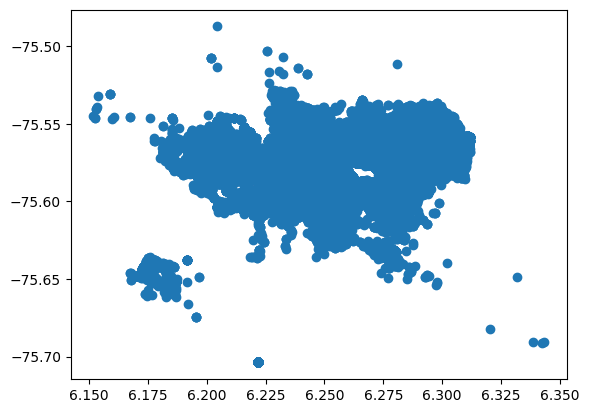

In [ ]:
x_column = data['X']
y_column = data['Y']

# Create scatter plot
plt.scatter(y_column, x_column)


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_features

array([[ 0.5484362 ,  1.78478142],
       [-3.14569331, -0.93659706],
       [-0.13166181,  0.69678338],
       ...,
       [-0.36489397,  0.58159465],
       [ 0.1107477 , -1.17213889],
       [ 0.72195298, -0.31065203]])

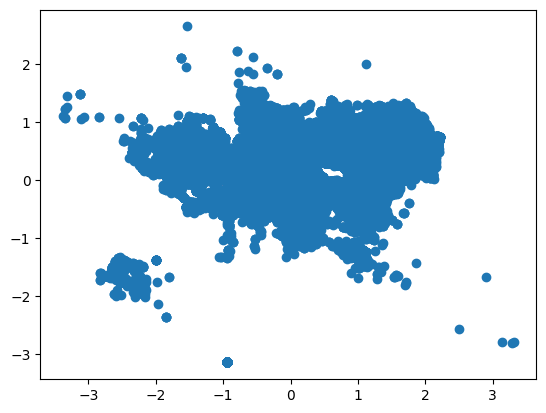

In [ ]:
x_col = scaled_features[:, 0]
y_col = scaled_features[:, 1]
# Create scatter plot
plt.scatter( y_col, x_col)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

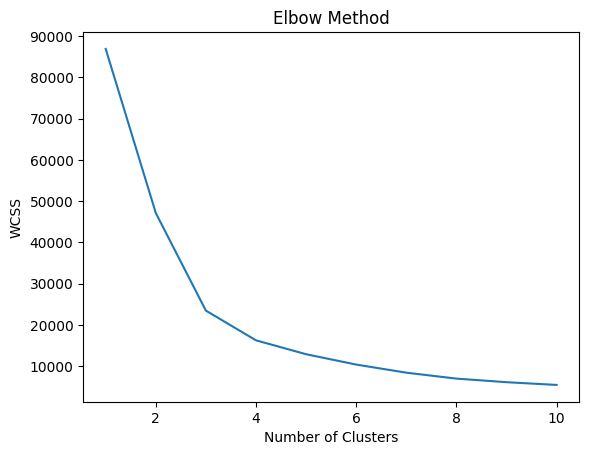

In [ ]:
# Initialize list to store WCSS values
wcss = []

# Calculate WCSS for different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(
  init="random",
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
  )

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

23467.980264222795

In [ ]:
kmeans.cluster_centers_

array([[ 0.23087595, -0.58133298],
       [-2.87957496, -1.19955572],
       [ 0.32013064,  0.96841154]])

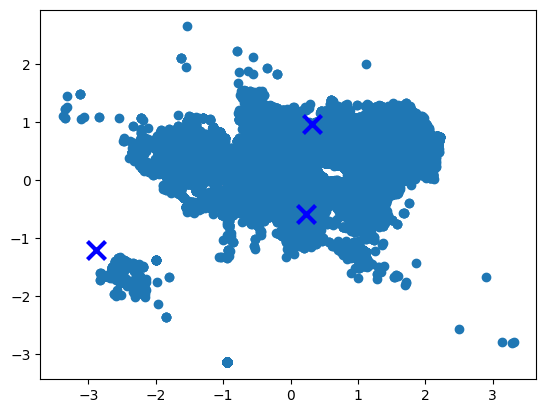

In [ ]:
x_col = scaled_features[:, 0]
y_col = scaled_features[:, 1]
# Create scatter plot
plt.scatter( y_col,x_col)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)

In [ ]:
standardized_centroids = kmeans.cluster_centers_

# Inverse transform the standardized centroids to the original scale
original_centroids = scaler.inverse_transform(standardized_centroids)
original_centroids

array([[-75.57751288,   6.23197125],
       [-75.69386153,   6.21428132],
       [-75.57417424,   6.27631587]])

In [ ]:
labels = kmeans.predict(scaled_features)
df['label'] = labels
df

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD,label
0,-75.565634,6.299676,549556,1611786.0,2018/01/02 00:00:00+00,03:18:00,2,2018,Atropello,CR 64 C CL 103 GG,...,Castilla,Tramo de via,MARTES,1,NaN,835295.93,1188611.46,-75.565634,6.299676,2
1,-75.703816,6.221806,549557,1611722.0,2018/01/02 00:00:00+00,03:35:00,2,2018,Choque,CR 63 CL 123,...,NaN,Lote o Predio,MARTES,1,NaN,820000.00,1180000.00,-75.703816,6.221806,1
2,-75.591074,6.268543,549558,1611859.0,2018/01/02 00:00:00+00,05:10:00,2,2018,Choque,CR 75 CL 59,...,Robledo,Tramo de via,MARTES,1,NaN,832480.16,1185167.89,-75.591074,6.268543,2
3,-75.569627,6.219092,549559,1611705.0,2018/01/02 00:00:00+00,05:26:00,2,2018,Otro,CR 43 A CL 17,...,El Poblado,Lote o Predio,MARTES,1,NaN,834853.96,1179697.78,-75.569627,6.219092,0
4,-75.575473,6.240001,549560,1611750.0,2018/01/02 00:00:00+00,05:45:00,2,2018,Choque,CR 55 CL 37,...,La Candelaria,Tramo de via,MARTES,1,NaN,834206.83,1182010.64,-75.575473,6.240001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43450,-75.563465,6.253182,686841,1651954.0,2018/12/01 00:00:00+00,11:45:00,1,2018,Choque,CR 47 CL 56,...,La Candelaria,Interseccion,SÁBADO,12,NaN,835536.09,1183468.66,-75.563465,6.253182,0
43451,-75.574709,6.236105,686842,1651995.0,2018/12/01 00:00:00+00,12:00:00,1,2018,Choque,CL 33 CR 52,...,La Candelaria,Tramo de via,SÁBADO,12,NaN,834291.46,1181579.67,-75.574709,6.236105,0
43452,-75.599798,6.265247,686843,1651922.0,2018/12/01 00:00:00+00,12:00:00,1,2018,Choque,CR 82 CL 51,...,La América,Tramo de via,SÁBADO,12,NaN,831514.50,1184803.36,-75.599798,6.265247,2
43453,-75.582006,6.215066,686844,1651882.0,2018/12/01 00:00:00+00,12:00:00,1,2018,Choque,CR 52 CL 10,...,Guayabal,Glorieta,SÁBADO,12,NaN,833483.60,1179252.49,-75.582006,6.215066,0


## Se tiene un nuevo dato que se debe clasificar con el modelo

In [ ]:

X = -75.57729365323246
Y = 6.197730069245207

nuevo_dato = pd.DataFrame([[X,Y]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'X', 1: 'Y'})
nuevo_dato

,X,Y
0,-75.577294,6.19773


Se agrega al final del dataframe

In [ ]:
df_n = df.append(nuevo_dato)

<ipython-input-71-65c9ec38280a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_n = df.append(nuevo_dato)


Se vuelven a numerar los indices de las filas

In [ ]:
df_n = df_n.reset_index(drop=True)
df_n

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD,label
0,-75.565634,6.299676,549556.0,1611786.0,2018/01/02 00:00:00+00,03:18:00,2.0,2018.0,Atropello,CR 64 C CL 103 GG,...,Castilla,Tramo de via,MARTES,1.0,NaN,835295.93,1188611.46,-75.565634,6.299676,2.0
1,-75.703816,6.221806,549557.0,1611722.0,2018/01/02 00:00:00+00,03:35:00,2.0,2018.0,Choque,CR 63 CL 123,...,NaN,Lote o Predio,MARTES,1.0,NaN,820000.00,1180000.00,-75.703816,6.221806,1.0
2,-75.591074,6.268543,549558.0,1611859.0,2018/01/02 00:00:00+00,05:10:00,2.0,2018.0,Choque,CR 75 CL 59,...,Robledo,Tramo de via,MARTES,1.0,NaN,832480.16,1185167.89,-75.591074,6.268543,2.0
3,-75.569627,6.219092,549559.0,1611705.0,2018/01/02 00:00:00+00,05:26:00,2.0,2018.0,Otro,CR 43 A CL 17,...,El Poblado,Lote o Predio,MARTES,1.0,NaN,834853.96,1179697.78,-75.569627,6.219092,0.0
4,-75.575473,6.240001,549560.0,1611750.0,2018/01/02 00:00:00+00,05:45:00,2.0,2018.0,Choque,CR 55 CL 37,...,La Candelaria,Tramo de via,MARTES,1.0,NaN,834206.83,1182010.64,-75.575473,6.240001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43451,-75.574709,6.236105,686842.0,1651995.0,2018/12/01 00:00:00+00,12:00:00,1.0,2018.0,Choque,CL 33 CR 52,...,La Candelaria,Tramo de via,SÁBADO,12.0,NaN,834291.46,1181579.67,-75.574709,6.236105,0.0
43452,-75.599798,6.265247,686843.0,1651922.0,2018/12/01 00:00:00+00,12:00:00,1.0,2018.0,Choque,CR 82 CL 51,...,La América,Tramo de via,SÁBADO,12.0,NaN,831514.50,1184803.36,-75.599798,6.265247,2.0
43453,-75.582006,6.215066,686844.0,1651882.0,2018/12/01 00:00:00+00,12:00:00,1.0,2018.0,Choque,CR 52 CL 10,...,Guayabal,Glorieta,SÁBADO,12.0,NaN,833483.60,1179252.49,-75.582006,6.215066,0.0
43454,-75.559144,6.239717,686845.0,1651917.0,2018/12/01 00:00:00+00,12:15:00,1.0,2018.0,Choque,CR 36 CL 43,...,Buenos Aires,Tramo de via,SÁBADO,12.0,NaN,836014.36,1181979.17,-75.559144,6.239717,0.0


## Se vuelven a filtrar las columnas que se necesitan

In [ ]:
data_n=df_n.iloc[:, :2] #datos para clustering

## Se vuelven a estandarizar los datos

In [ ]:

scaler = StandardScaler()
scaled_features_n = scaler.fit_transform(data_n)
scaled_features_n = pd.DataFrame(scaled_features_n) # Hay que convertir a DF el resultado.
scaled_features_n = scaled_features_n.rename(columns = {0: 'X', 1: 'Y'})
scaled_features_n

,X,Y
0,0.548437,1.784778
1,-3.145733,-0.936533
2,-0.131669,0.696807
3,0.441699,-1.031377
4,0.285398,-0.300664
...,...,...
43451,0.305840,-0.436822
43452,-0.364903,0.581621
43453,0.110743,-1.172069
43454,0.721955,-0.310603


In [ ]:
long_n = scaled_features_n['X'][43455]
lat_n = scaled_features_n['Y'][43455]
X_new = np.array([[long_n, lat_n]]) # Nuevo dato

Se imprime el cluster del nuevo dato

In [ ]:
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
